##  "Problem 1" Determine the initial value of the center point

In [1]:
from sklearn.datasets import make_blobs  
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [3]:
n_clusters = 4
myu = X[np.random.choice(len(X),size=n_clusters,replace=False)]

In [4]:
print(myu)

[[-1.84482705  3.25609891]
 [-0.77354537  7.87923564]
 [-1.26789718  7.25141327]
 [ 0.96217896  4.51795326]]


## Problem 2 -6

In [5]:
class ScratchKMeans():
    """
    K-meansのスクラッチ実装

    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, n_clusters=2,n_init=20,n_iter=100,verbose=False):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.n_iter = n_iter
        self.verbose = verbose
        self.best_sse = 10**20

    def fit(self, X):
        for i in range(self.n_init):
            self.myu = X[np.random.choice(len(X),size=self.n_clusters,replace=False)]
            cluster = np.zeros(len(X))
            X_cluster = np.concatenate([X,cluster.reshape(-1,1)],axis=1)
            for j in range(self.n_iter):
                self.calc_sse(X_cluster)
                self._update_cluster(X_cluster)
                self._update_myu(X_cluster)
                if self.verbose:
                    print("初期化：%s　学習回数：%s　最善のSSE：%s"%(i,j,self.best_sse))

    def calc_sse(self,X):
            sse = 0
            for i in range(len(X)):
                for j in range(self.n_clusters):
                    if j == X[i,-1]:
                        sse += np.sum((X[i,:-1]-self.myu[j])**2)
            if self.best_sse > sse:
                self.best_sse = sse
                self.record_myu = self.myu
                self.record_cluster = self.n_clusters

    # "Problem 3" Assignment to a cluster
    def _update_cluster(self,X):
            for i in range(len(X)):
                dist_m = 10**20
                for j in range(self.n_clusters):
                    dist = np.sqrt(np.sum((X[i,:-1]-self.myu[j])**2))
                    if dist < dist_m:
                        dist_m = dist
                        X[i,-1] = j
    # "Problem 4" Moving the center point
    def _update_myu(self,X):
            for j in range(self.n_clusters):
                self.myu[j] = np.mean(X[X[:,-1]==j,:-1],axis=0)


    def predict(self, X):
        y_pred = np.zeros(len(X))
        for i in range(len(X)):
            dist_m = 10**20
            for j in range(self.record_cluster):
                dist = np.sqrt(np.sum((X[i]-self.record_myu[j])**2))
                if dist < dist_m:
                    dist_m = dist
                    y_pred[i] = j
        return y_pred

## 

In [6]:
X_train, X_valid = \
train_test_split(X,train_size=0.8,random_state=None)

In [24]:
X_train

array([[-1.6609057 ,  3.31911046],
       [ 0.72144399,  4.08475018],
       [-1.47602203,  7.8441996 ],
       [ 0.4519936 ,  3.59377836],
       [-1.2386086 ,  2.81373288],
       [ 1.51989121,  1.42488952],
       [-1.57006498,  6.72375844],
       [ 2.28809874,  0.12954182],
       [-1.8219901 ,  7.61654999],
       [-1.42525273,  7.14798437],
       [ 2.23345072,  1.25095024],
       [-1.26041884,  7.46644456],
       [ 2.14398059,  0.69677319],
       [-1.95751686,  3.87291474],
       [ 1.05374379,  4.49286859],
       [ 1.40848818,  3.93270482],
       [ 1.19820169,  4.47062449],
       [-0.92819001,  7.02698199],
       [-1.89928142,  2.50466299],
       [-0.78782636,  7.99482384],
       [-1.64996061,  7.49068513],
       [-1.74836345,  7.06307447],
       [-1.21986433,  3.3789856 ],
       [-1.86097353,  8.2576415 ],
       [-1.32890066,  2.37135151],
       [-0.59312453,  3.37090459],
       [ 0.96217896,  4.51795326],
       [ 1.73810647,  0.71629308],
       [-1.91186205,

In [7]:
clf = ScratchKMeans(n_clusters=4,n_init=5,n_iter=100,verbose=True)
clf.fit(X_train)

初期化：0　学習回数：0　最善のSSE：2339.177999796535
初期化：0　学習回数：1　最善のSSE：122.38662437437993
初期化：0　学習回数：2　最善のSSE：54.63443971724059
初期化：0　学習回数：3　最善のSSE：37.081069134496985
初期化：0　学習回数：4　最善のSSE：37.081069134496985
初期化：0　学習回数：5　最善のSSE：37.081069134496985
初期化：0　学習回数：6　最善のSSE：37.081069134496985
初期化：0　学習回数：7　最善のSSE：37.081069134496985
初期化：0　学習回数：8　最善のSSE：37.081069134496985
初期化：0　学習回数：9　最善のSSE：37.081069134496985
初期化：0　学習回数：10　最善のSSE：37.081069134496985
初期化：0　学習回数：11　最善のSSE：37.081069134496985
初期化：0　学習回数：12　最善のSSE：37.081069134496985
初期化：0　学習回数：13　最善のSSE：37.081069134496985
初期化：0　学習回数：14　最善のSSE：37.081069134496985
初期化：0　学習回数：15　最善のSSE：37.081069134496985
初期化：0　学習回数：16　最善のSSE：37.081069134496985
初期化：0　学習回数：17　最善のSSE：37.081069134496985
初期化：0　学習回数：18　最善のSSE：37.081069134496985
初期化：0　学習回数：19　最善のSSE：37.081069134496985
初期化：0　学習回数：20　最善のSSE：37.081069134496985
初期化：0　学習回数：21　最善のSSE：37.081069134496985
初期化：0　学習回数：22　最善のSSE：37.081069134496985
初期化：0　学習回数：23　最善のSSE：37.081069134496985
初期化：0　学習回数：24　最善のSSE：37.081069134496985
初期化：0　学習回数：2

In [8]:
pred = clf.predict(X_valid)

## [Problem 8] Implementation of elbow method

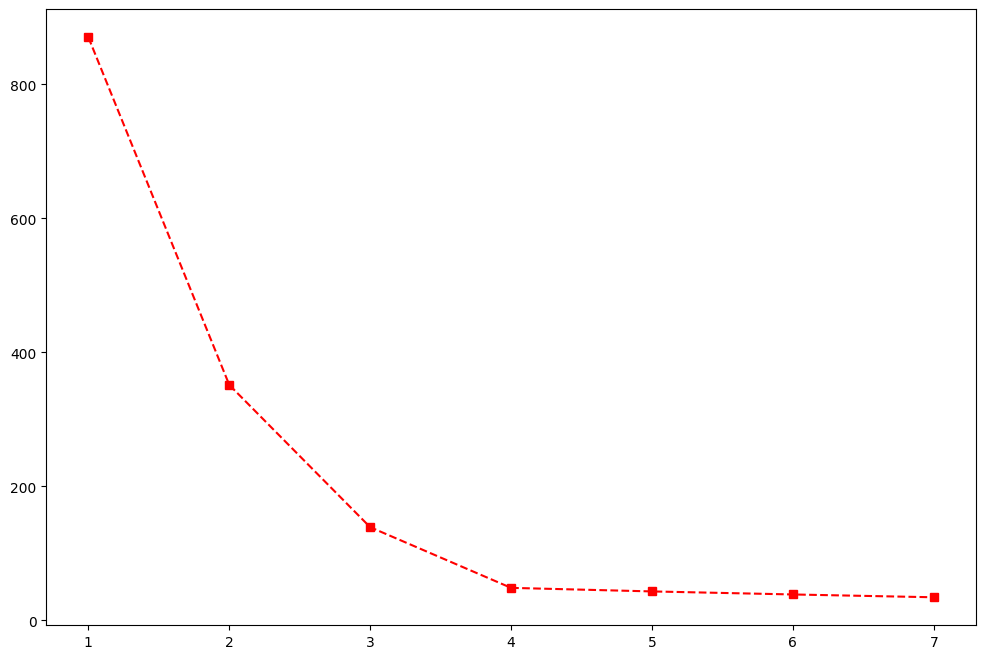

In [9]:
elbow = {}
for k in range(1,8):
    model = ScratchKMeans(n_clusters=k,n_init=5,n_iter=100,verbose=False)
    model.fit(X)
    elbow[k] = model.best_sse
fig = plt.subplots(figsize=(12,8))
plt.rcParams["font.size"] = 20
plt.plot(list(elbow.keys()),list(elbow.values()),'rs--')

# Wholesaler data analysis
## [Problem 10] Selection of the number of clusters k

In [26]:
df = pd.read_csv('../data/wholesaler/wcdata.csv')

In [27]:
df.shape

(440, 8)

In [28]:
df.tail()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125
439,1,3,2787,1698,2510,65,477,52


In [29]:
data = df[['Channel', 'Region']]
data.head()

,Channel,Region
0,2,3
1,2,3
2,2,3
3,1,3
4,2,3


In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca = pca.fit(data)
data_pca = pca.transform(data)